# Wrangling Data

### Author: Avikal Somvanshi

In [38]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
from pandas.tools.plotting import scatter_matrix
import sys
reload(sys)
import zipfile
import geopandas as gpd
import json
sys.setdefaultencoding('utf-8')
%pylab inline


In [39]:
#Unzipping downloaded nyc income
zipfile.ZipFile(os.path.join("Data/ACS_15_5YR_B19301.zip")).extractall(r"Data/income")

In [40]:
# loading income for NYC
nyc_income = pd.read_csv("Data/income/ACS_15_5YR_B19301_with_ann.csv")
nyc_income.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,Id,Id2,Geography,Estimate; Per capita income in the past 12 mon...,Margin of Error; Per capita income in the past...
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",-,**
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",2440,373
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",-,**
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",20931,4870


In [41]:
nyc_income.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HD01_VD01',
       u'HD02_VD01'],
      dtype='object')

In [42]:
nyc_income = nyc_income[[u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HD01_VD01']]

In [43]:
nyc_income.columns = [[u'GEO.id', u'GEO.id2', u'GEO.display-label', u'Median_income']]

In [44]:
nyc_income.head()

,GEO.id,GEO.id2,GEO.display-label,Median_income
0,Id,Id2,Geography,Estimate; Per capita income in the past 12 mon...
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",-
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",2440
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",-
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",20931


In [45]:
#Unzipping downloaded nyc rent
zipfile.ZipFile(os.path.join("Data/ACS_15_5YR_B25064.zip")).extractall(r"Data/rent")

In [46]:
# loading rent for NYC
nyc_rent = pd.read_csv("Data/rent/ACS_15_5YR_B25064_with_ann.csv")
nyc_rent.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01
0,Id,Id2,Geography,Estimate; Median gross rent,Margin of Error; Median gross rent
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",-,**
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",-,**
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",-,**
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",1557,340


In [47]:
nyc_rent.columns

Index([u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HD01_VD01',
       u'HD02_VD01'],
      dtype='object')

In [48]:
nyc_rent = nyc_rent[[u'GEO.id', u'GEO.id2', u'GEO.display-label', u'HD01_VD01']]

In [49]:
nyc_rent.columns = [[u'GEO.id', u'GEO.id2', u'GEO.display-label', u'Median_rent']]

In [50]:
nyc_rent.head()

,GEO.id,GEO.id2,GEO.display-label,Median_rent
0,Id,Id2,Geography,Estimate; Median gross rent
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",-
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",-
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",-
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",1557


In [51]:
#Unzipping downloaded nyc shapefile in a dataframe
zipfile.ZipFile(os.path.join("Data/gz_2010_36_150_00_500k.zip")).extractall(r"Data/gz_2010_36_150_00_500k")

In [52]:
# loading shape file for NYC
nyc_shape = gpd.read_file("Data/gz_2010_36_150_00_500k/gz_2010_36_150_00_500k.shp")
nyc_shape.head()

,BLKGRP,CENSUSAREA,COUNTY,GEO_ID,LSAD,NAME,STATE,TRACT,geometry
0,1,0.776,001,1500000US360010001001,BG,1,36,000100,"POLYGON ((-73.741342 42.670231, -73.740979 42...."
1,2,0.138,001,1500000US360010001002,BG,2,36,000100,"POLYGON ((-73.74012499999999 42.670589, -73.74..."
2,1,0.560,001,1500000US360010002001,BG,1,36,000200,"POLYGON ((-73.74926499999999 42.658246, -73.75..."
3,2,0.080,001,1500000US360010002002,BG,2,36,000200,"POLYGON ((-73.751678 42.657408, -73.757971 42...."
4,3,0.084,001,1500000US360010002003,BG,3,36,000200,POLYGON ((-73.75354899999999 42.65626899999999...


In [53]:
nyc_shape.columns

Index([    u'BLKGRP', u'CENSUSAREA',     u'COUNTY',     u'GEO_ID',
             u'LSAD',       u'NAME',      u'STATE',      u'TRACT',
         u'geometry'],
      dtype='object')

In [54]:
nyc_shape.columns = [[u'BLKGRP', u'CENSUSAREA',     u'COUNTY',     u'GEO.id',
             u'LSAD',       u'NAME',      u'STATE',      u'TRACT',
         u'geometry']]

In [55]:
nyc_shape.head()

,BLKGRP,CENSUSAREA,COUNTY,GEO.id,LSAD,NAME,STATE,TRACT,geometry
0,1,0.776,001,1500000US360010001001,BG,1,36,000100,"POLYGON ((-73.741342 42.670231, -73.740979 42...."
1,2,0.138,001,1500000US360010001002,BG,2,36,000100,"POLYGON ((-73.74012499999999 42.670589, -73.74..."
2,1,0.560,001,1500000US360010002001,BG,1,36,000200,"POLYGON ((-73.74926499999999 42.658246, -73.75..."
3,2,0.080,001,1500000US360010002002,BG,2,36,000200,"POLYGON ((-73.751678 42.657408, -73.757971 42...."
4,3,0.084,001,1500000US360010002003,BG,3,36,000200,POLYGON ((-73.75354899999999 42.65626899999999...


In [56]:
nyc_shape = nyc_shape[[u'GEO.id', u'geometry']]
nyc_shape.head()

,GEO.id,geometry
0,1500000US360010001001,"POLYGON ((-73.741342 42.670231, -73.740979 42...."
1,1500000US360010001002,"POLYGON ((-73.74012499999999 42.670589, -73.74..."
2,1500000US360010002001,"POLYGON ((-73.74926499999999 42.658246, -73.75..."
3,1500000US360010002002,"POLYGON ((-73.751678 42.657408, -73.757971 42...."
4,1500000US360010002003,POLYGON ((-73.75354899999999 42.65626899999999...


In [57]:
#Merging dataframes
nyc_soco = pd.merge(nyc_rent, nyc_shape, how='left', on='GEO.id')
nyc_soco = pd.merge(nyc_soco, nyc_income, how='left')
nyc_soco

,GEO.id,GEO.id2,GEO.display-label,Median_rent,geometry,Median_income
0,Id,Id2,Geography,Estimate; Median gross rent,NaN,Estimate; Per capita income in the past 12 mon...
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",-,"POLYGON ((-73.892504 40.801206, -73.872264 40....",-
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",-,"POLYGON ((-73.892866 40.790567, -73.89039 40.7...",2440
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",-,"POLYGON ((-73.86270399999999 40.797276, -73.86...",-
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",1557,"POLYGON ((-73.85772 40.813362, -73.85913699999...",20931
5,1500000US360050002002,360050002002,"Block Group 2, Census Tract 2, Bronx County, N...",1287,"POLYGON ((-73.85913699999999 40.813171, -73.85...",21855
6,1500000US360050002003,360050002003,"Block Group 3, Census Tract 2, Bronx County, N...",1243,"POLYGON ((-73.855312 40.809329, -73.854417 40....",24709
7,1500000US360050004000,360050004000,"Block Group 0, Census Tract 4, Bronx County, N...",-,"POLYGON ((-73.847689 40.806065, -73.8479849999...",-
8,1500000US360050004001,360050004001,"Block Group 1, Census Tract 4, Bronx County, N...",1543,"POLYGON ((-73.856291 40.813555, -73.8556179999...",15411
9,1500000US360050004002,360050004002,"Block Group 2, Census Tract 4, Bronx County, N...",1411,POLYGON ((-73.85561799999999 40.81060799999999...,18834


In [58]:
nyc_soco.Median_income[1]

'-'

In [59]:
#replacing '-' with nan
nyc_soco.replace('-', np.nan, inplace=True)
nyc_soco

,GEO.id,GEO.id2,GEO.display-label,Median_rent,geometry,Median_income
0,Id,Id2,Geography,Estimate; Median gross rent,NaN,Estimate; Per capita income in the past 12 mon...
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",NaN,"POLYGON ((-73.892504 40.801206, -73.872264 40....",NaN
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",NaN,"POLYGON ((-73.892866 40.790567, -73.89039 40.7...",2440
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",NaN,"POLYGON ((-73.86270399999999 40.797276, -73.86...",NaN
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",1557,"POLYGON ((-73.85772 40.813362, -73.85913699999...",20931
5,1500000US360050002002,360050002002,"Block Group 2, Census Tract 2, Bronx County, N...",1287,"POLYGON ((-73.85913699999999 40.813171, -73.85...",21855
6,1500000US360050002003,360050002003,"Block Group 3, Census Tract 2, Bronx County, N...",1243,"POLYGON ((-73.855312 40.809329, -73.854417 40....",24709
7,1500000US360050004000,360050004000,"Block Group 0, Census Tract 4, Bronx County, N...",NaN,"POLYGON ((-73.847689 40.806065, -73.8479849999...",NaN
8,1500000US360050004001,360050004001,"Block Group 1, Census Tract 4, Bronx County, N...",1543,"POLYGON ((-73.856291 40.813555, -73.8556179999...",15411
9,1500000US360050004002,360050004002,"Block Group 2, Census Tract 4, Bronx County, N...",1411,POLYGON ((-73.85561799999999 40.81060799999999...,18834


In [60]:
nyc_soco.to_csv('nyc_social.csv')

In [61]:
#nyc_soco.dropna(inplace=True)
nyc_soco.drop([0], inplace=True)
nyc_soco.head()

,GEO.id,GEO.id2,GEO.display-label,Median_rent,geometry,Median_income
1,1500000US360050001000,360050001000,"Block Group 0, Census Tract 1, Bronx County, N...",NaN,"POLYGON ((-73.892504 40.801206, -73.872264 40....",NaN
2,1500000US360050001001,360050001001,"Block Group 1, Census Tract 1, Bronx County, N...",NaN,"POLYGON ((-73.892866 40.790567, -73.89039 40.7...",2440
3,1500000US360050002000,360050002000,"Block Group 0, Census Tract 2, Bronx County, N...",NaN,"POLYGON ((-73.86270399999999 40.797276, -73.86...",NaN
4,1500000US360050002001,360050002001,"Block Group 1, Census Tract 2, Bronx County, N...",1557,"POLYGON ((-73.85772 40.813362, -73.85913699999...",20931
5,1500000US360050002002,360050002002,"Block Group 2, Census Tract 2, Bronx County, N...",1287,"POLYGON ((-73.85913699999999 40.813171, -73.85...",21855


In [62]:
nyc_soco.set_index(nyc_soco['GEO.id'], inplace=True)
nyc_soco = nyc_soco[['geometry', 'Median_rent', 'Median_income']]
nyc_soco.head()

,geometry,Median_rent,Median_income
GEO.id,,,
1500000US360050001000,"POLYGON ((-73.892504 40.801206, -73.872264 40....",NaN,NaN
1500000US360050001001,"POLYGON ((-73.892866 40.790567, -73.89039 40.7...",NaN,2440
1500000US360050002000,"POLYGON ((-73.86270399999999 40.797276, -73.86...",NaN,NaN
1500000US360050002001,"POLYGON ((-73.85772 40.813362, -73.85913699999...",1557,20931
1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855


In [63]:
nyc_soco.dropna(inplace=True)

In [64]:
from geopandas import GeoDataFrame
df_rein = GeoDataFrame(nyc_soco, geometry= nyc_soco.geometry)

In [65]:
df_rein.head()

,geometry,Median_rent,Median_income
GEO.id,,,
1500000US360050002001,"POLYGON ((-73.85772 40.813362, -73.85913699999...",1557,20931
1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855
1500000US360050002003,"POLYGON ((-73.855312 40.809329, -73.854417 40....",1243,24709
1500000US360050004001,"POLYGON ((-73.856291 40.813555, -73.8556179999...",1543,15411
1500000US360050004002,POLYGON ((-73.85561799999999 40.81060799999999...,1411,18834


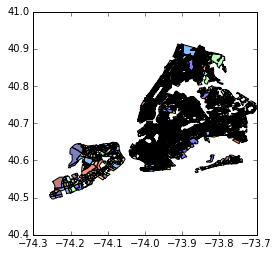

In [66]:
df_rein.plot()

In [67]:
gdf = gpd.GeoDataFrame.from_file('Data/NYClisting.geojson')
gdf.head()

,accesstosubway,availability_365,boro_ct_2010,calculated_host_listings_count,geometry,host_id,host_name,id,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type
0,11.946361,156,2051600,1,POINT (-73.78954050381778 40.8448695719099),403032,Diane,9147025,2017-03-02,40.844870,-73.789541,2,Cozy City Island Cottage,City Island,Bronx,36,125,2.49,Entire home/apt
1,12.035697,362,2051600,1,POINT (-73.78143724844766 40.83939619387105),20433973,Julia,3943387,2016-10-22,40.839396,-73.781437,1,Cozy City Island Room/Private Bath,City Island,Bronx,21,65,0.75,Private room
2,12.400226,365,2051600,1,POINT (-73.78949621071705 40.8558982857858),1843520,Wendy,15220538,2016-11-26,40.855898,-73.789496,2,Airy and Peaceful Room and Bath in Victorian Home,City Island,Bronx,5,110,1.01,Private room
3,12.248530,335,2051600,1,POINT (-73.78660938743727 40.84977456920603),13886510,Arlene,6627449,2016-10-24,40.849775,-73.786609,3,Large 1 BDRM in Great location,City Island,Bronx,12,125,0.59,Entire home/apt
4,12.267700,174,2051600,1,POINT (-73.78867963460138 40.85205377887418),119445,Linda & Didier,7949480,2017-02-26,40.852054,-73.788680,1,City Island Sanctuary relaxing BR & Bath w Par...,City Island,Bronx,23,99,1.68,Private room


In [68]:
gdf['location'] = gdf.geometry

In [69]:
df_rein.reset_index(inplace=True)

In [70]:
ddf = gpd.sjoin(df_rein,gdf, how='inner')
ddf

,GEO.id,geometry,Median_rent,Median_income,index_right,accesstosubway,availability_365,boro_ct_2010,calculated_host_listings_count,host_id,...,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type,location
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9101,8.368050,242,2002400,10,525710,...,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room,POINT (-73.86406089014145 40.81274651012037)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9098,8.380864,365,2000200,10,525710,...,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room,POINT (-73.86381389361847 40.81293405229447)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9097,8.406552,336,2000200,10,525710,...,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room,POINT (-73.86370502873359 40.81359965937455)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9093,8.371107,327,2000200,10,525710,...,-73.865384,2,"Private & Quiet Room for Two, Twin Beds (2D)",Clason Point,Bronx,17,43,3.27,Private room,POINT (-73.86538438829932 40.81382212404414)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9095,8.428738,328,2000200,10,525710,...,-73.863285,2,Room for 2 in private community house in NYC (3A),Clason Point,Bronx,4,43,0.91,Private room,POINT (-73.86328527198702 40.81392708658173)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9096,8.388353,365,2000200,10,525710,...,-73.865115,2,Heart & Soul of NYC - Bronx Community Living (2C),Clason Point,Bronx,2,59,0.37,Private room,POINT (-73.86511465990777 40.81412108870071)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9087,8.421343,325,2000200,10,525710,...,-73.863943,2,Private Room Quiet Neighborhood Twin Beds (3D),Clason Point,Bronx,12,43,2.02,Private room,POINT (-73.86394281331403 40.81420527560628)
1,1500000US360050002002,"POLYGON ((-73.85913699999999 40.813171, -73.85...",1287,21855,9084,8.400627,357,2000200,10,525710,...,-73.865140,3,Large Private Room in Quiet Neighborhood (2B),Clason Point,Bronx,6,77,1.25,Private room,POINT (-73.86514021809725 40.81449257586157)
3,1500000US360050004001,"POLYGON ((-73.856291 40.813555, -73.8556179999...",1543,15411,9083,8.540691,284,2000400,1,19810363,...,-73.856068,2,Garden House in the East Bronx,Clason Point,Bronx,26,110,1.23,Entire home/apt,POINT (-73.85606789098367 40.81149825893302)
4,1500000US360050004002,POLYGON ((-73.85561799999999 40.81060799999999...,1411,18834,9092,8.587326,63,2000400,1,60800878,...,-73.853002,1,Cozy room in serene house,Clason Point,Bronx,0,21,NaN,Shared room,POINT (-73.85300182228902 40.81028869870194)


In [73]:
ddf.geometry = ddf.location
ddf.head()

,GEO.id,geometry,Median_rent,Median_income,index_right,accesstosubway,availability_365,boro_ct_2010,calculated_host_listings_count,host_id,...,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type,location
1,1500000US360050002002,POINT (-73.86406089014145 40.81274651012037),1287,21855,9101,8.368050,242,2002400,10,525710,...,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room,POINT (-73.86406089014145 40.81274651012037)
1,1500000US360050002002,POINT (-73.86381389361847 40.81293405229447),1287,21855,9098,8.380864,365,2000200,10,525710,...,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room,POINT (-73.86381389361847 40.81293405229447)
1,1500000US360050002002,POINT (-73.86370502873359 40.81359965937455),1287,21855,9097,8.406552,336,2000200,10,525710,...,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room,POINT (-73.86370502873359 40.81359965937455)
1,1500000US360050002002,POINT (-73.86538438829932 40.81382212404414),1287,21855,9093,8.371107,327,2000200,10,525710,...,-73.865384,2,"Private & Quiet Room for Two, Twin Beds (2D)",Clason Point,Bronx,17,43,3.27,Private room,POINT (-73.86538438829932 40.81382212404414)
1,1500000US360050002002,POINT (-73.86328527198702 40.81392708658173),1287,21855,9095,8.428738,328,2000200,10,525710,...,-73.863285,2,Room for 2 in private community house in NYC (3A),Clason Point,Bronx,4,43,0.91,Private room,POINT (-73.86328527198702 40.81392708658173)


In [78]:
ddf.drop(['location', 'GEO.id'], axis=1, inplace=True)

In [79]:
ddf.head()

,geometry,Median_rent,Median_income,index_right,accesstosubway,availability_365,boro_ct_2010,calculated_host_listings_count,host_id,host_name,...,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,price,reviews_per_month,room_type
1,POINT (-73.86406089014145 40.81274651012037),1287,21855,9101,8.368050,242,2002400,10,525710,Libby,...,40.812747,-73.864061,2,Community Living in the Heart & Soul of NYC (3C),Clason Point,Bronx,9,59,1.53,Private room
1,POINT (-73.86381389361847 40.81293405229447),1287,21855,9098,8.380864,365,2000200,10,525710,Libby,...,40.812934,-73.863814,2,"Private Room for 2, Community House NYC (2A)",Clason Point,Bronx,2,43,0.42,Private room
1,POINT (-73.86370502873359 40.81359965937455),1287,21855,9097,8.406552,336,2000200,10,525710,Libby,...,40.813600,-73.863705,1,King sized bed + futon in Large Private Room ...,Clason Point,Bronx,6,76,1.37,Private room
1,POINT (-73.86538438829932 40.81382212404414),1287,21855,9093,8.371107,327,2000200,10,525710,Libby,...,40.813822,-73.865384,2,"Private & Quiet Room for Two, Twin Beds (2D)",Clason Point,Bronx,17,43,3.27,Private room
1,POINT (-73.86328527198702 40.81392708658173),1287,21855,9095,8.428738,328,2000200,10,525710,Libby,...,40.813927,-73.863285,2,Room for 2 in private community house in NYC (3A),Clason Point,Bronx,4,43,0.91,Private room


In [35]:
#ddf.dropna(inplace=True)
#ddf

In [80]:
with open('NYClistings.geojson', 'w') as f:
    f.write(ddf.to_json())
    
#ddf.to_csv('Data/Airbnb_NYC_rent_income.csv')

# Good to go!